# To create an AI model for predicting high head count and table reservation frequency based on dummy data for a reservation system

### Step 0: Create Dummy Data
Let's define the schema for the reservation table and generate dummy data.

Reservation Table Schema:

id (int, primary key)
customer_id (int)
table_id (int)
reservation_date (datetime)
head_count (int)
time_slot (varchar)
week (int)


### Step 1: Create AI Model Using Reservation Table
We'll use Python and libraries like pandas, scikit-learn, and TensorFlow to create and train the AI model.

In [1]:
#Step 1: Create AI Model Using Reservation Table

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dummy data into a DataFrame
data = pd.read_csv('reservations.csv')

# Convert reservation_date to datetime
data['reservation_date'] = pd.to_datetime(data['reservation_date'])

# Extract features
data['hour'] = data['reservation_date'].dt.hour
data['day_of_week'] = data['reservation_date'].dt.dayofweek

# Model 1: Predicting High Head Count for a Given Time Slot
X = data[['hour', 'day_of_week']]
y = data['head_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model_head_count = RandomForestRegressor()
model_head_count.fit(X_train, y_train)

# Model 2: Predicting Table Reservation Frequency per Week
data_weekly = data.groupby('week').size().reset_index(name='reservation_count')
X_weekly = data_weekly[['week']]
y_weekly = data_weekly['reservation_count']

# Split the data into training and testing sets
X_weekly_train, X_weekly_test, y_weekly_train, y_weekly_test = train_test_split(X_weekly, y_weekly, test_size=0.2, random_state=42)

# Create and train the model
model_reservation_frequency = LinearRegression()
model_reservation_frequency.fit(X_weekly_train, y_weekly_train)


LinearRegression()

### Step 2: Use Head Count and Time Slot to Predict High Head Count in a Defined Time Slot

Using the trained model_head_count, we can predict the head count for given time slots.

In [2]:
# Step 2: Use Head Count and Time Slot to Predict High Head Count in a Defined Time Slot

def predict_head_count(hour, day_of_week):
    return model_head_count.predict([[hour, day_of_week]])

# Example: Predict head count for 12:00 PM on Monday (day_of_week = 0)
predicted_head_count = predict_head_count(12, 0)

c:\Users\sahan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Step 3: Use Tables Reserved Per Week Data to Predict Table Reservation Frequency
Using the trained model_reservation_frequency, we can predict the number of reservations for a given week.

In [3]:
def predict_reservation_frequency(week):
    return model_reservation_frequency.predict([[week]])

# Example: Predict reservations for week 20
predicted_reservations = predict_reservation_frequency(20)
print(f"Predicted reservations for week 20: {predicted_reservations}")


Predicted reservations for week 20: [9.]


c:\Users\sahan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Step 4: Create Graphs to Show This in the Model Itself
Using Matplotlib and Seaborn to visualize the data and predictions.

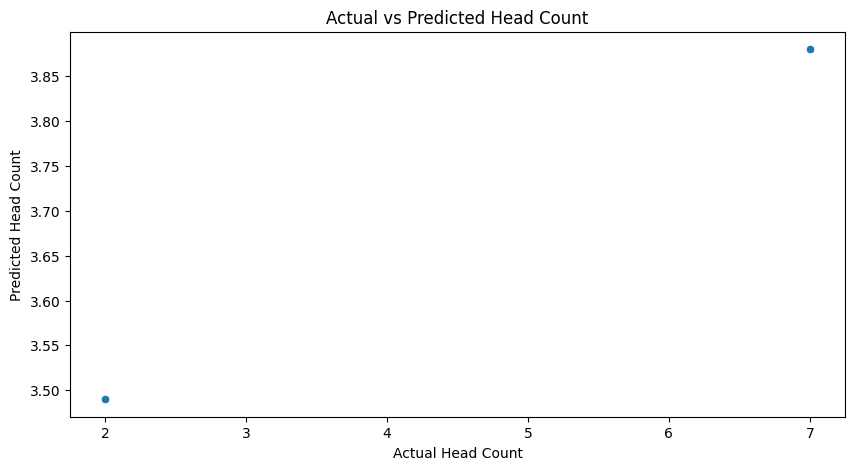

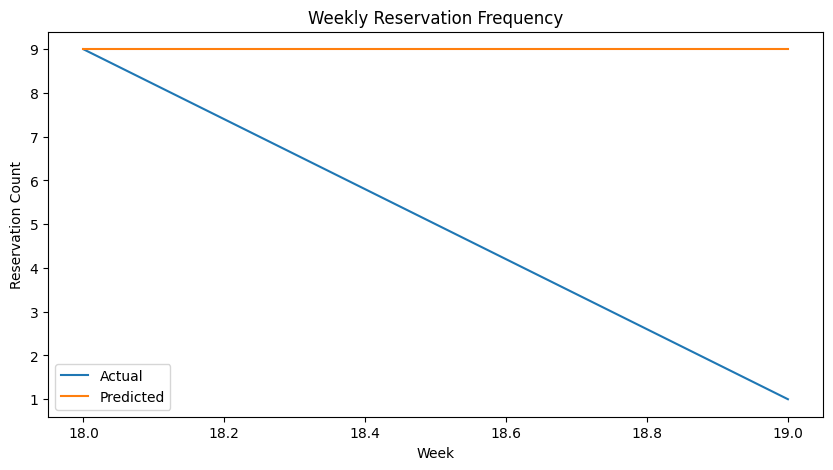

In [4]:
# Plot actual vs predicted head count
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=model_head_count.predict(X_test))
plt.xlabel('Actual Head Count')
plt.ylabel('Predicted Head Count')
plt.title('Actual vs Predicted Head Count')
plt.show()

# Plot weekly reservation frequency
plt.figure(figsize=(10, 5))
sns.lineplot(x=data_weekly['week'], y=data_weekly['reservation_count'], label='Actual')
sns.lineplot(x=data_weekly['week'], y=model_reservation_frequency.predict(X_weekly), label='Predicted')
plt.xlabel('Week')
plt.ylabel('Reservation Count')
plt.title('Weekly Reservation Frequency')
plt.legend()
plt.show()


### Step 5: Create API to Fetch This Data
Using Flask to create an API for fetching predictions.

In [11]:
import numpy as np
from flask import Flask, request, jsonify

app = Flask(__name__)

# Dummy data and models for illustration
def predict_head_count(hour, day_of_week):
    # Replace with actual prediction logic
    return np.random.randint(1, 10)

def predict_reservation_frequency(week):
    # Replace with actual prediction logic
    return np.random.randint(1, 50)

@app.route('/')
def home():
    return "Welcome to the Reservation Prediction API"

@app.route('/predict_head_count', methods=['GET'])
def get_head_count_prediction():
    hour = int(request.args.get('hour'))
    day_of_week = int(request.args.get('day_of_week'))
    prediction = predict_head_count(hour, day_of_week)
    return jsonify({'predicted_head_count': prediction.tolist()})

@app.route('/predict_reservation_frequency', methods=['GET'])
def get_reservation_frequency_prediction():
    week = int(request.args.get('week'))
    prediction = predict_reservation_frequency(week)
    return jsonify({'predicted_reservations': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


### Step 6: Run the Flask App from the Command Line

1. Open a terminal or command prompt.
2. Navigate to the directory where `app.py` is located.
3. Run the Flask app by executing:

```sh
python app.py
```



### Step 7: Verify the Flask App is Running

After running the command, you should see output indicating that the Flask app is running:

```sh
* Serving Flask app 'app'
* Debug mode: on
* Running on http://127.0.0.1:5000 (Press CTRL+C to quit)
```



### Step 8: Access the API Endpoints

You can now test the API endpoints by navigating to the URLs in your web browser or using a tool like `curl` or Postman. For example, to test the head count prediction, you can access:

```
http://127.0.0.1:5000/predict_head_count?hour=12&day_of_week=0
```

And for reservation frequency:

```
http://127.0.0.1:5000/predict_reservation_frequency?week=20
```